In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import random
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix

In [304]:
fData = pd.read_csv("C:\\Users\\aloky\\OneDrive\\Desktop\\ML Mini Projects\\FFD\\FFD\\fData.csv")

In [305]:
fData.head()

,Unnamed: 0,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [306]:
fData.drop(fData.columns[fData.columns.str.contains('Unnamed',case=False)], axis=1, inplace=True)

In [307]:
fData.shape

(463644, 11)

In [308]:
fData.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,463644.000000,4.636440e+05,4.636440e+05,4.636440e+05,4.636440e+05,4.636440e+05,463644.000000,463644.0
mean,13.491133,1.688000e+05,8.992499e+05,9.190083e+05,9.828097e+05,1.167316e+06,0.000475,0.0
std,3.553987,2.765594e+05,2.950359e+06,2.987721e+06,2.338954e+06,2.518722e+06,0.021778,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,11.000000,1.346674e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,14.000000,8.191337e+04,1.854278e+04,0.000000e+00,1.148958e+05,2.207192e+05,0.000000,0.0
75%,16.000000,2.256487e+05,1.730303e+05,2.132758e+05,8.932662e+05,1.206546e+06,0.000000,0.0
max,19.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.148270e+07,4.148270e+07,1.000000,0.0


In [309]:
fData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463644 entries, 0 to 463643
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            463644 non-null  int64  
 1   type            463644 non-null  object 
 2   amount          463644 non-null  float64
 3   nameOrig        463644 non-null  object 
 4   oldbalanceOrg   463644 non-null  float64
 5   newbalanceOrig  463644 non-null  float64
 6   nameDest        463644 non-null  object 
 7   oldbalanceDest  463644 non-null  float64
 8   newbalanceDest  463644 non-null  float64
 9   isFraud         463644 non-null  int64  
 10  isFlaggedFraud  463644 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 38.9+ MB


In [310]:
print(str(fData.isnull().sum().max()))

0


In [311]:
fData['isFraud'].value_counts()

isFraud
0    463424
1       220
Name: count, dtype: int64

In [312]:
import plotly.express as px
type = fData['isFraud'].value_counts()
cases= type.index
quantity = type.values
px.pie(fData, values=quantity, names=cases, hole=0.4, title="Distribution of the Fraud and Non Fraud Cases")

In [313]:
import plotly.express as px
type = fData['type'].value_counts()
transaction = type.index
quantity = type.values
px.pie(fData, values=quantity, names=transaction, hole=0.4, title="Distribution of Transaction Type")

Text(0.5, 1.0, 'Fraud Transactions by Fraud Type ')

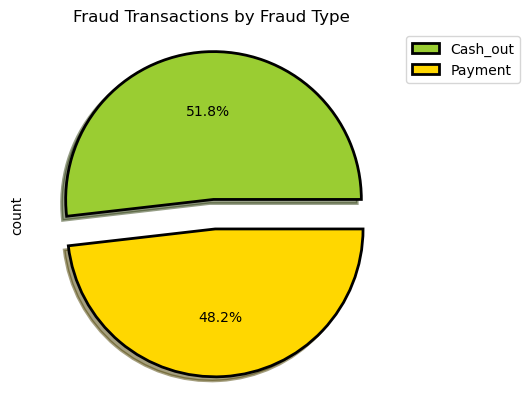

In [314]:
fraud_data = fData[fData.isFraud == 1]
colors = ("yellowgreen","gold","skyblue", "red","purple")
wp = {'linewidth': 2, 'edgecolor': 'black'}
tags = fraud_data['type'].value_counts()
explode = (0.1, 0.1)
labels = ['Cash_out','Payment', 'Cah_In', 'Transfer', 'Debit']
pie = tags.plot(kind='pie', shadow=True, colors=colors, autopct='%1.1f%%', wedgeprops=wp, explode=explode, labels=None)
plt.legend(labels, loc="upper left", bbox_to_anchor=(1, 1.0))
plt.title("Fraud Transactions by Fraud Type ")

In [315]:
label_encoder = LabelEncoder()
fData['type'] = label_encoder.fit_transform(fData['type'])

In [316]:
fData.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [317]:
x=fData[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y=fData['isFraud']
print(x.shape,y.shape)

(463644, 4) (463644,)


In [318]:
x.head()

,type,amount,oldbalanceOrg,newbalanceOrig
0,3,9839.64,170136.0,160296.36
1,3,1864.28,21249.0,19384.72
2,4,181.00,181.0,0.00
3,1,181.00,181.0,0.00
4,3,11668.14,41554.0,29885.86


In [319]:
from imblearn.over_sampling import RandomOverSampler
over_sampling = RandomOverSampler(sampling_strategy='auto', random_state=1)
x_res, y_res = over_sampling.fit_resample(x,y)

In [320]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=.30, random_state=1)

In [321]:
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train)

In [322]:
from scipy import stats
x_train = stats.zscore(x_train)
x_test = stats.zscore(x_test)

In [323]:
y_train_original = y_train
y_test_original = y_test

In [324]:
print(y_train[10])
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=2)
print(y_train[10])

0
[1. 0.]


In [325]:
from tensorflow.keras import optimizers
random.seed(0)

In [326]:
model = Sequential()
model.add(Dense(64, input_shape = (4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation='softmax'))

In [327]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'], run_eagerly=True)

In [328]:
model.fit(x_train, y_train, batch_size=1000, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
649/649 [==============================] - 30s 46ms/step - loss: 0.2553 - accuracy: 0.8945 - val_loss: 0.1815 - val_accuracy: 0.9372
Epoch 2/10
649/649 [==============================] - 29s 44ms/step - loss: 0.1675 - accuracy: 0.9368 - val_loss: 0.1696 - val_accuracy: 0.9524
Epoch 3/10
649/649 [==============================] - 30s 46ms/step - loss: 0.1480 - accuracy: 0.9455 - val_loss: 0.1392 - val_accuracy: 0.9471
Epoch 4/10
649/649 [==============================] - 30s 46ms/step - loss: 0.1348 - accuracy: 0.9514 - val_loss: 0.1257 - val_accuracy: 0.9559
Epoch 5/10
649/649 [==============================] - 29s 45ms/step - loss: 0.1284 - accuracy: 0.9545 - val_loss: 0.1256 - val_accuracy: 0.9543
Epoch 6/10
649/649 [==============================] - 29s 45ms/step - loss: 0.1230 - accuracy: 0.9568 - val_loss: 0.1151 - val_accuracy: 0.9585
Epoch 7/10
649/649 [==============================] - 31s 47ms/step - loss: 0.1190 - accuracy: 0.9582 - val_loss: 0.1228 - val_accuracy:

In [329]:
model.evaluate(x_test,y_test)

8690/8690 [==============================] - 113s 13ms/step - loss: 0.1185 - accuracy: 0.9568


[0.11849906295537949, 0.9568322896957397]

In [330]:
y_pred = model.predict(x_test)

8690/8690 [==============================] - 39s 5ms/step


In [331]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 64)                320       
                                                                 
 dense_78 (Dense)            (None, 64)                4160      
                                                                 
 dense_79 (Dense)            (None, 32)                2080      
                                                                 
 dense_80 (Dense)            (None, 2)                 66        
                                                                 
Total params: 6626 (25.88 KB)
Trainable params: 6626 (25.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [332]:
y_test_arg = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test),axis=1)

8690/8690 [==============================] - 41s 5ms/step


<Axes: >

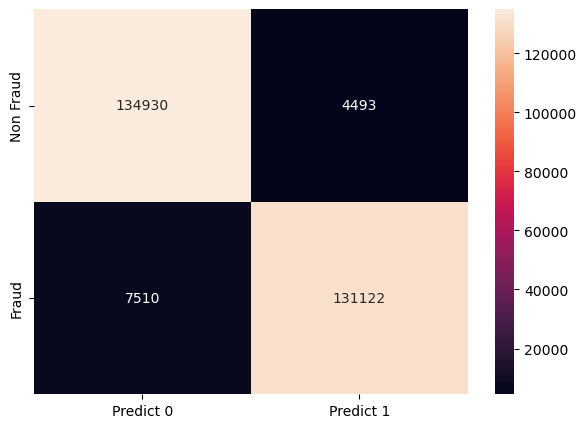

In [349]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test_arg, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index= [i for i in ['Non Fraud', 'Fraud']],
                    columns=[i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [351]:
accuracy = accuracy_score(y_test_arg, y_pred)
precision = precision_score(y_test_arg, y_pred)
recall = recall_score(y_test_arg, y_pred)
f1 = f1_score(y_test_arg, y_pred)

print("Neural Network Classifier:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Neural Network Classifier:
Accuracy: 0.9568322813831796
Precision: 0.9668694465951406
Recall: 0.9458278031046223
F1 Score: 0.9562328849540742
